In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.tree import DecisionTreeClassifier

In [15]:
cardio = pd.read_csv('C:/Users/17f16985/Downloads/cardio_train.csv', delimiter=';')
cardio.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [16]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [21]:
cardio.drop(columns=['age'], inplace=True)

In [22]:
cardio.describe().T


,count,mean,std,min,25%,50%,75%,max
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0
active,70000.0,0.803729,0.397179,0.0,1.0,1.0,1.0,1.0


In [23]:
cardio.isna().sum()


gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [29]:
cardio['gender'] = (cardio['gender'] / 365).round().astype('int')

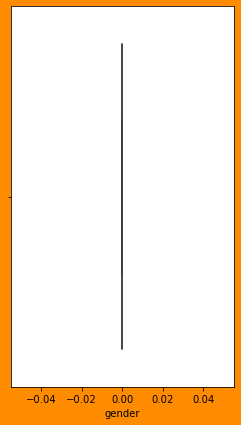

In [31]:
plt.figure(figsize=(4,7), facecolor='DarkOrange')
sns.boxplot(cardio.gender, color='Brown');

In [33]:
qua_low = cardio.quantile(0.015)
qua_high = cardio.quantile(0.975)

c1 = cardio[(cardio.height > qua_high.height) |
            (cardio.height < qua_low.height) |
            (cardio.weight > qua_high.weight) |
            (cardio.weight < qua_low.weight) |
            (cardio.gender < qua_low.gender)].index

cardio.drop(c1, inplace=True)

In [34]:
cardio.ap_hi = cardio.ap_hi.abs()
cardio.ap_lo = cardio.ap_lo.abs()

In [35]:
cardio.drop(cardio[(cardio.ap_hi > qua_high.ap_hi) |
                   (cardio.ap_hi < qua_low.ap_hi) |
                   (cardio.ap_lo > qua_high.ap_lo) | 
                   (cardio.ap_lo < qua_low.ap_lo)].index,inplace=True)

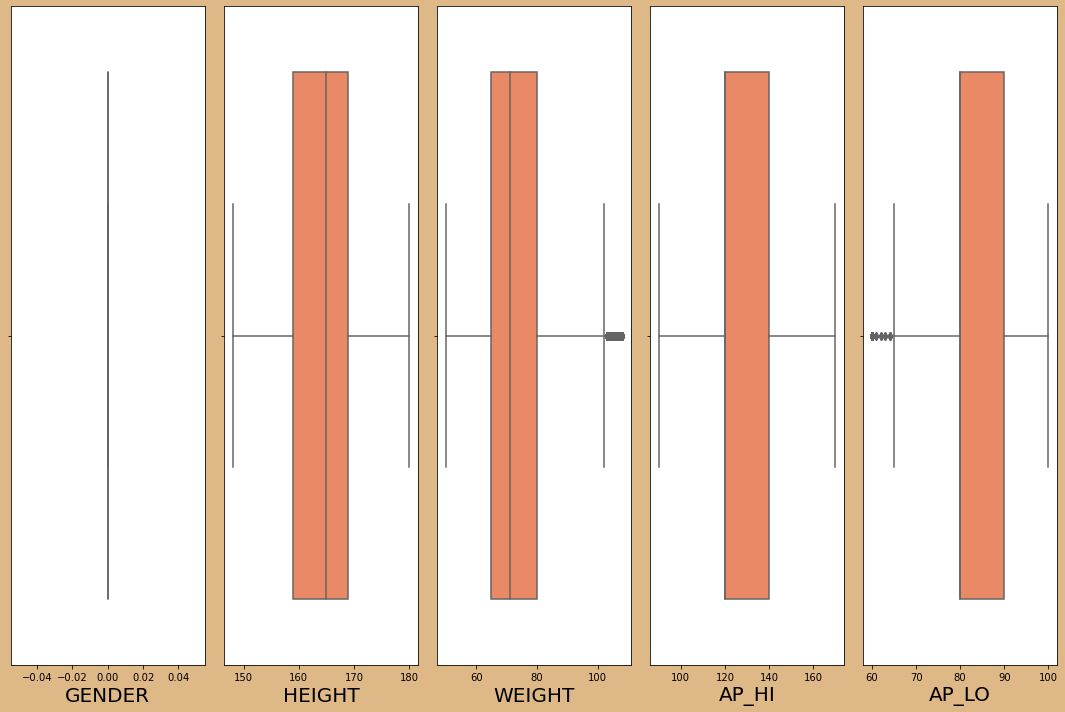

In [37]:
cardio_cont= cardio[['gender','height','weight','ap_hi','ap_lo']]

plt.figure(figsize=(15,10), facecolor='BurlyWood')
plotnumber =1

for column in cardio_cont:
    if plotnumber<=5:
        ax=plt.subplot(1,5,plotnumber)
        sns.boxplot(cardio_cont[column], color='Coral')
        plt.xlabel(column.upper(), fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()
plt.show()

In [38]:
cardio.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,62884.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
height,62884.0,164.315899,6.991895,148.0,159.0,165.0,169.0,180.0
weight,62884.0,73.208709,11.992817,50.0,65.0,71.0,80.0,108.0
ap_hi,62884.0,125.641244,14.830126,90.0,120.0,120.0,140.0,170.0
ap_lo,62884.0,80.876853,8.591684,60.0,80.0,80.0,90.0,100.0
cholesterol,62884.0,1.353381,0.670913,1.0,1.0,1.0,1.0,3.0
gluc,62884.0,1.219754,0.566271,1.0,1.0,1.0,1.0,3.0
smoke,62884.0,0.085014,0.278904,0.0,0.0,0.0,0.0,1.0
alco,62884.0,0.051555,0.221129,0.0,0.0,0.0,0.0,1.0
active,62884.0,0.803845,0.397090,0.0,1.0,1.0,1.0,1.0


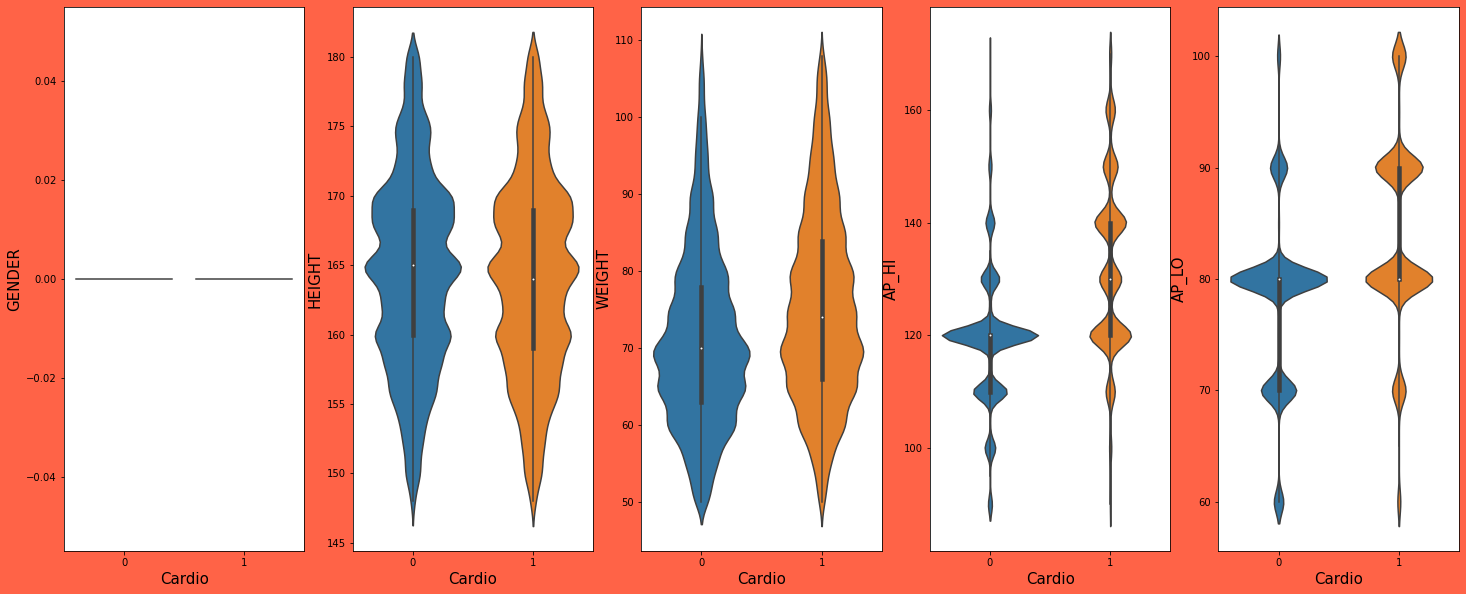

In [39]:
cont= cardio[['gender','height','weight','ap_hi','ap_lo']]

plt.figure(figsize=(25,10), facecolor='Tomato')
plotnumber = 1

for columns in cont:
    if plotnumber <=5:
        ax=plt.subplot(1,5,plotnumber)
        #sns.boxenplot(cont[columns])
        sns.violinplot(data=cardio, y=cont[columns], x="cardio")
        plt.ylabel(columns.upper(), fontsize = 15)
        plt.xlabel('Cardio', fontsize= 15)
    plotnumber+=1    

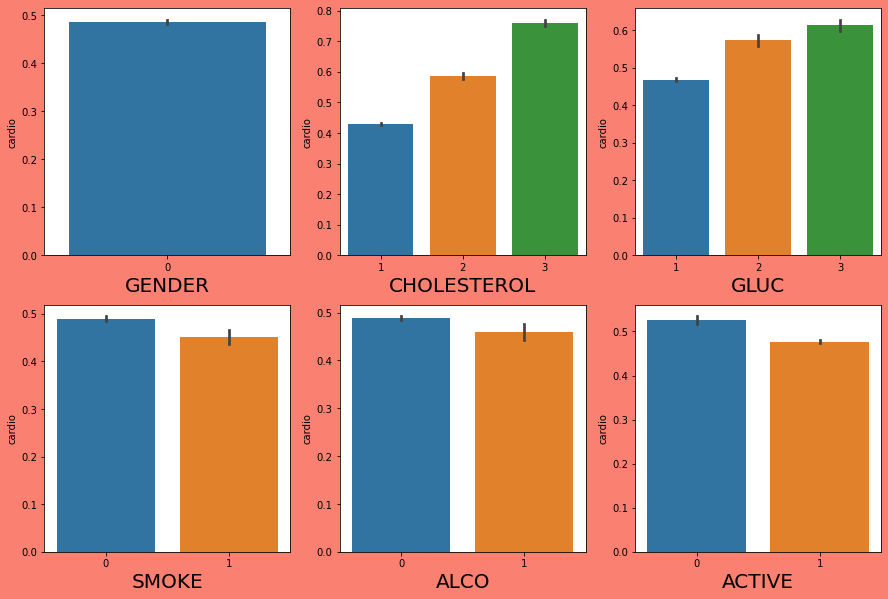

In [40]:
cate= cardio[['gender','cholesterol','gluc','smoke','alco','active']]

plt.figure(figsize=(15,10), facecolor='Salmon')
plotnumber = 1

for columns in cate:
    if plotnumber <=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.barplot(x=cate[columns], y=cardio.cardio, data= cardio)
        plt.xlabel(columns.upper(), fontsize = 20)
    plotnumber+=1    

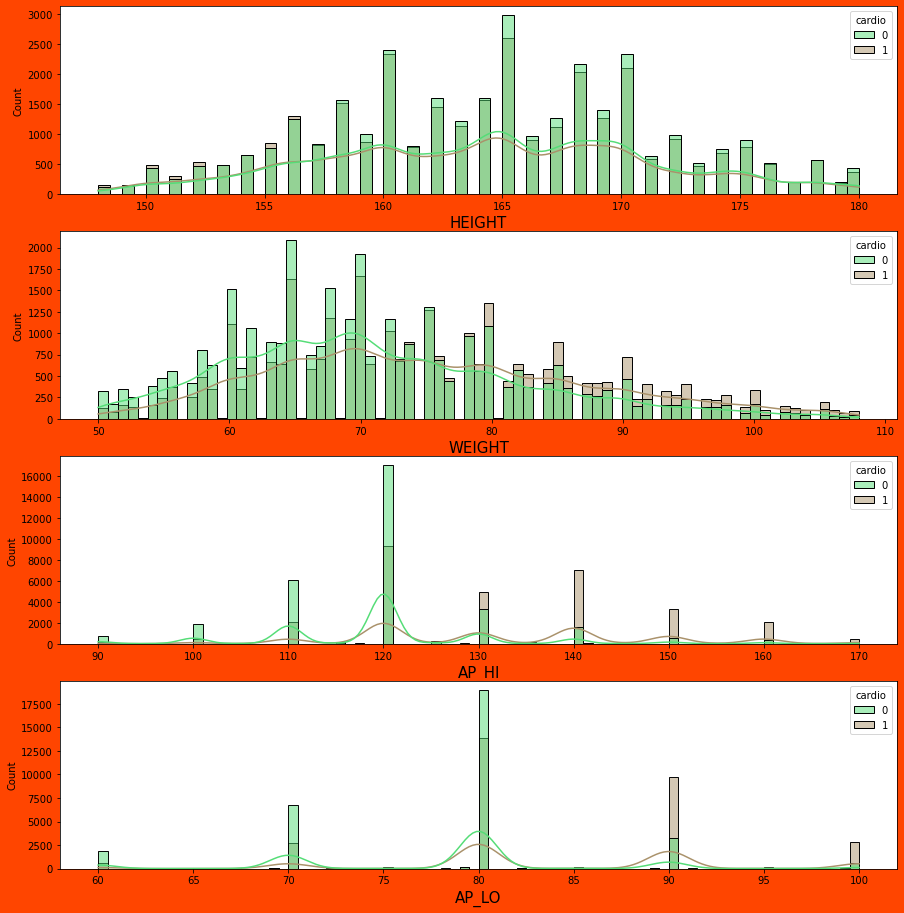

In [44]:
cont= cardio[['height','weight','ap_hi','ap_lo']]

plt.figure(figsize=(15,20), facecolor='OrangeRed')
plotnumber = 1

for columns in cont:
    if plotnumber <=5:
        ax=plt.subplot(5,1,plotnumber)
        sns.histplot(x= cont[columns], hue= cardio.cardio, 
                     data=cardio, palette='terrain', kde=True)
        plt.xlabel(columns.upper(), fontsize = 15)
    plotnumber+=1    

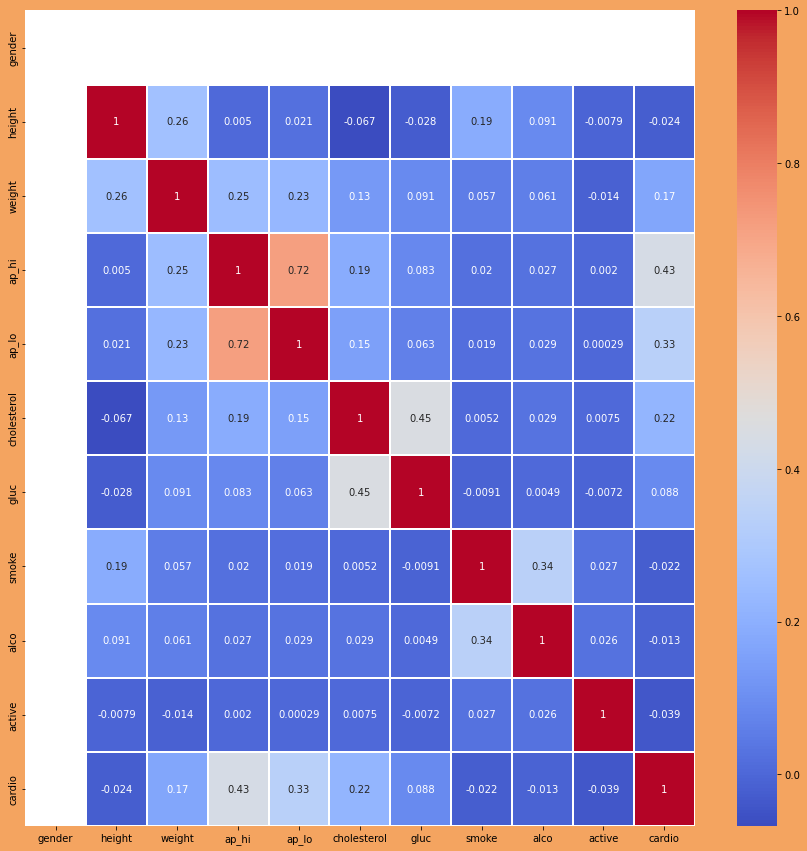

In [45]:
plt.figure(figsize=(15,15), facecolor='SandyBrown')
sns.heatmap(cardio.corr(), annot=True, cmap='coolwarm',linewidths=0.05);

In [46]:
# Separating feature and output/result
X = cardio.drop(columns=['cardio'])
y = cardio.cardio

# Splting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

# Initializing Logistic regression 
lgr = LogisticRegression()

# Fitting Logistic modle
lgr.fit(X_train, y_train)

# Predict the model
y_pred = lgr.predict(X_test)

# Model Report/results
print('Accuracy Score', (accuracy_score(y_pred,y_test))*100)
print('\n Confusion Matrix \n', confusion_matrix(y_pred, y_test))
print('\n Classfication Report \n', classification_report(y_pred,y_test))

Accuracy Score 71.79568729724572

 Confusion Matrix 
 [[6403 2780]
 [1654 4884]]

 Classfication Report 
               precision    recall  f1-score   support

           0       0.79      0.70      0.74      9183
           1       0.64      0.75      0.69      6538

    accuracy                           0.72     15721
   macro avg       0.72      0.72      0.72     15721
weighted avg       0.73      0.72      0.72     15721



In [47]:
# Initialize Scaler Model
scaler = StandardScaler()

# Apply scaler model
X_scaled =scaler.fit_transform(X)

# Spliting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=100)


# Fitting Logistic modle
lgr.fit(X_train, y_train)

# Predict the model
y_pred = lgr.predict(X_test)

# Model Report/results
print('Accuracy Score', (accuracy_score(y_pred,y_test))*100)
print('\n Confusion Matrix \n', confusion_matrix(y_pred, y_test))
print('\n Classfication Report \n', classification_report(y_pred,y_test))

Accuracy Score 72.31728261560968

 Confusion Matrix 
 [[6475 2770]
 [1582 4894]]

 Classfication Report 
               precision    recall  f1-score   support

           0       0.80      0.70      0.75      9245
           1       0.64      0.76      0.69      6476

    accuracy                           0.72     15721
   macro avg       0.72      0.73      0.72     15721
weighted avg       0.74      0.72      0.73     15721



In [48]:
# Spliting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=250)

# Initializing Decision Tree
Class_tree= DecisionTreeClassifier(criterion= 'gini', max_depth= 3)

# Applying Decision Tree model to data
Class_tree.fit(X_train,y_train)

# Predict the model
y_pred = Class_tree.predict(X_test)

# Model Report/results
print('Accuracy Score', (accuracy_score(y_pred,y_test))*100)
print('\n Confusion Matrix \n', confusion_matrix(y_pred, y_test))
print('\n Classfication Report \n', classification_report(y_pred,y_test))

Accuracy Score 71.85929648241206

 Confusion Matrix 
 [[6370 2689]
 [1735 4927]]

 Classfication Report 
               precision    recall  f1-score   support

           0       0.79      0.70      0.74      9059
           1       0.65      0.74      0.69      6662

    accuracy                           0.72     15721
   macro avg       0.72      0.72      0.72     15721
weighted avg       0.73      0.72      0.72     15721



In [49]:
# parameter's
param =  {
    'criterion': ['gini','entropy',"log_loss"],
    'max_depth' : range(6,15),
    'min_samples_leaf' : range(11,16),
    'max_features' : [ 'sqrt', 'log2' , None],
    'splitter' : ['best','random']
}

# Initializing Grid Search CV
grid_search = GridSearchCV(estimator=Class_tree,
                           param_grid=param, cv=5, n_jobs=-1)

#Applying Grid Search CV
grid_search.fit(X_train, y_train)


#Result
print('Grid Search Best Parameter',grid_search.best_params_)
print('Grid Search Best Score',grid_search.best_score_)

Grid Search Best Parameter {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 13, 'splitter': 'random'}
Grid Search Best Score 0.7245935330526699


In [51]:
# Initializing Decision Tree
Class_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, max_features = None,
                                   min_samples_leaf= 15, splitter='random')

# Applying Decision Tree model to data
Class_tree.fit(X_train,y_train)

# Predict the model
y_pred = Class_tree.predict(X_test)

# Model Report/results
print('Accuracy Score', (accuracy_score(y_pred,y_test))*100)
print('\n Confusion Matrix \n', confusion_matrix(y_pred, y_test))
print('\n Classfication Report \n', classification_report(y_pred,y_test))

Accuracy Score 71.63030341581324

 Confusion Matrix 
 [[6458 2813]
 [1647 4803]]

 Classfication Report 
               precision    recall  f1-score   support

           0       0.80      0.70      0.74      9271
           1       0.63      0.74      0.68      6450

    accuracy                           0.72     15721
   macro avg       0.71      0.72      0.71     15721
weighted avg       0.73      0.72      0.72     15721

